# Python : Manipulation des données avec Pandas

## Chargement et description des données

### Librairie Pandas - Options et version

Il faut charger la librairie et, éventuellement, la configurer selon vos attentes. 

In [2]:
#Première étape : il faut charger la librairie Pandas
import pandas as pd

#vérifier la version
print(pd.__version__)

2.2.3


### Le DataFrame

Nous avons déjà vu la structure de dataDrame en cours

Le fichier sur lequel nous allons travailler est un fichier "classique" de type CSV

Dans ce qui suit, nous chargeons le fichier de données et nous procédons à quelques vérifications.

In [4]:
#chargement du fichier
#données est le nom de l'objet de type data frame créé
données = pd.read_csv('auto-mpg.csv')

#vérifions le type du dataFrame
print(type(données))

<class 'pandas.core.frame.DataFrame'>


Le type DataFrame est bien reconnu.

Voyons maintenant l'architecture de la structure DataFrame.

In [5]:
# utiliser  la commande shape afin connaître la taille du fichier
données.shape

(398, 9)

In [6]:
# afficher les 5 premières lignes du jeu de données
print(données.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
# énumérer les colonnes
print(données.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [8]:
# donner le type de chaque colonne
print(données.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [9]:
#informations sur les données
données.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


La méthode **describe()** nous permet d'obtenir des statistiques **univariées** sur notre DF, que pouvez-vous en déduire ?

In [10]:
print(données.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


## Accès aux Series

### les Series (une colonne d'un dataframe)

Il est possible d'accéder explicitement aux Series en donnant de manière explicite la colonne sur laquelle on travaille

In [11]:
#accès à une colonne
print(données['horsepower'])

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object


### Transformer un DataFrame
En mettant sous forme de listes les colonnes que l'on souhaite conserver, on se retrouve avec un nouveau DataFrame

In [12]:
#accéder à un ensemble de colonnes
données[['mpg','horsepower']]

,mpg,horsepower
0,18.0,130
1,15.0,165
2,18.0,150
3,16.0,150
4,17.0,140
...,...,...
393,27.0,86
394,44.0,52
395,32.0,84
396,28.0,79


In [13]:
# pourquoi pas données['mpg','horsepower']

In [14]:
# afficher les 5 premières lignes de la Series horsepower
print(données['horsepower'].head())

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object


In [15]:
#afficher les 5  dernières valeurs de cette même Series
print(données['horsepower'].tail())

393    86
394    52
395    84
396    79
397    82
Name: horsepower, dtype: object


In [16]:
# comme vous pouvez le voir la Series horsepwer est considérée comme object et non comme int
# utiliser la méthode str.isnumeric() pour détecter combien de valeurs ne sont pas numériques
# en conjonction avec la méthode value_counts()
non_numeric_counts = données['horsepower'].str.isnumeric().value_counts()

# Afficher le résultat
print(non_numeric_counts)

horsepower
True     392
False      6
Name: count, dtype: int64


In [17]:
## utiliser value_counts() et/ou unique() pour détecter les valeurs incorrectes
# Filtrer les valeurs non numériques
non_numeric_values = données[~données['horsepower'].str.isnumeric()]['horsepower']

# Afficher les valeurs incorrectes uniques
print("\nValeurs non numériques :")
print(non_numeric_values.unique())

# Compter les occurrences des valeurs non numériques
print("\nOccurrences des valeurs incorrectes :")
print(non_numeric_values.value_counts()) 


Valeurs non numériques :
['?']

Occurrences des valeurs incorrectes :
horsepower
?    6
Name: count, dtype: int64


Vous pouvez remarquer que certains des valeurs de la puissance des voitures  sont  renseignées par la valeur _?_ ce qui nous empêche de calculer la moyenne et la médiane de cette Series.
Modifier cette dataFrame de manière à enlever les lignes où la puissance en chevaux est absente


In [18]:
# il est possible de filtre des valeurs dans un DF pour obtenir un nouveau dataframe
# Que donnent ? Explicitez les résultats
# données['horsepower']
# données['horsepower'] == 150
# données[données['horsepower'] == 150]

# Supprimer les lignes où 'horsepower' contient '?'
données_clean = données[données['horsepower'].str.isnumeric()]

# Convertir 'horsepower' en numérique pour calculer des statistiques
données_clean['horsepower'] = pd.to_numeric(données_clean['horsepower'])

print(données_clean)


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

C:\Users\Lahro\AppData\Local\Temp\ipykernel_21184\2618804684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  données_clean['horsepower'] = pd.to_numeric(données_clean['horsepower'])


In [19]:
données = données[données['horsepower'] != '?']
print(données.shape)
# Que devient le DF données, expliquez

(392, 9)


In [20]:
# calculer la nouvelle taille de votre dataframe et le type de données des colonnes
# vérifier que les données sont maintenant correctes pour 'horsepower'
print(données_clean.shape)
# Vérifier les valeurs non numériques restantes
non_numeric_remaining = données_clean['horsepower'].apply(lambda x: not str(x).isnumeric()).sum()

print(f"Nombre de valeurs non numériques restantes : {non_numeric_remaining}")


(392, 9)
Nombre de valeurs non numériques restantes : 0


Quel est le type de la Serie horsepower ? Pourquoi ?

Utiliser maintenant la méthode [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) afin de forcer la Series horsepower en entier. Le vérifier

In [21]:
# à vous de jouer
# Convertir la colonne 'horsepower' en entier
données_clean['horsepower'] = données_clean['horsepower'].astype(int)

# Vérifier le type de données de la colonne
print(données_clean['horsepower'].dtype)

# Afficher un aperçu des données
print(données_clean['horsepower'].head())

int64
0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: int64


In [22]:
# calculer la médiane et la moyenne de cette Series
# Calculer la moyenne
mean_horsepower = données_clean['horsepower'].mean()

# Calculer la médiane
median_horsepower = données_clean['horsepower'].median()

# Afficher les résultats
print(f"Moyenne de horsepower : {mean_horsepower}")
print(f"Médiane de horsepower : {median_horsepower}")

Moyenne de horsepower : 104.46938775510205
Médiane de horsepower : 93.5


In [23]:
#un type Series est un vecteur, il est possible d'utiliser des indices
données['horsepower'].iloc[0] # le iloc est facultatif, tester-le

'130'

In [24]:
# récupérer les valeurs par tranche
print(données['horsepower'][1:5]) # ou avec loc 

1    165
2    150
3    150
4    140
Name: horsepower, dtype: object


In [25]:
# trier les valeurs d'une variable de manière croissante, puis par valeur décroissante des chevaux
df_sorted = données_clean.sort_values(by=['model year', 'horsepower'], ascending=[True, False])

# Afficher les résultats triés
print(df_sorted)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
8    14.0          8         455.0         225    4425          10.0   
13   14.0          8         455.0         225    3086          10.0   
6    14.0          8         454.0         220    4354           9.0   
7    14.0          8         440.0         215    4312           8.5   
25   10.0          8         360.0         215    4615          14.0   
..    ...        ...           ...         ...     ...           ...   
383  38.0          4          91.0          67    1965          15.0   
384  32.0          4          91.0          67    1965          15.7   
385  38.0          4          91.0          67    1995          16.2   
378  38.0          4         105.0          63    2125          14.7   
394  44.0          4          97.0          52    2130          24.6   

     model year  origin                 car name  
8            70       1         pontiac catalina  
13           70       1  buick es

La plus petite valeur est 46 CV, elle correspond à l'observation aux voitures 19 et 102.
Afficher les.

214 est le numéro de l'individu portant la plus petite valeur de la variable age, puis vient le n°174, etc. Ces résultats sont complètement cohérents avec ceux

In [26]:
#le tri peut être généralisé aux DataFrames
# par exemple : trier le tableau de données selon la puissance en chevaux
# Tri croissant selon la colonne 'horsepower'
données = données.sort_values(by='horsepower', ascending=True)

# Afficher les 5 premières lignes du tableau trié
print(données.head(10))

# puis afficher les 10  premières lignes avec head()
données.sort_values(by='horsepower').head(10)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
256  20.5          6         225.0        100    3430          17.2   
199  20.0          6         225.0        100    3651          17.7   
334  23.7          3          70.0        100    2420          12.5   
98   16.0          6         250.0        100    3278          18.0   
99   18.0          6         232.0        100    2945          16.0   
191  22.0          6         225.0        100    3233          15.4   
107  18.0          6         232.0        100    2789          15.0   
357  32.9          4         119.0        100    2615          14.8   
47   19.0          6         250.0        100    3282          15.0   
37   18.0          6         232.0        100    3288          15.5   

     model year  origin               car name  
256          78       1        plymouth volare  
199          76       1         dodge aspen se  
334          80       3          mazda rx-7 gs  
98           73       

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
256,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare
169,20.0,6,232.0,100,2914,16.0,75,1,amc gremlin
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
227,19.0,6,225.0,100,3630,17.7,77,1,plymouth volare custom
133,16.0,6,250.0,100,3781,17.0,74,1,chevrolet chevelle malibu classic
127,19.0,6,232.0,100,2901,16.0,74,1,amc hornet
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
37,18.0,6,232.0,100,3288,15.5,71,1,amc matador
128,15.0,6,250.0,100,3336,17.0,74,1,chevrolet nova
357,32.9,4,119.0,100,2615,14.8,81,3,datsun 200sx


### Itérations sur les variables

Les itérations sur les variables peuvent se faire via une boucle, ou par l'utilisation  .apply() (un peu plus complexe). 

In [27]:
# boucler sur les 10 premières lignes
for i in range(10):
    print(données['car name'][i])

chevrolet chevelle malibu
buick skylark 320
plymouth satellite
amc rebel sst
ford torino
ford galaxie 500
chevrolet impala
plymouth fury iii
pontiac catalina
amc ambassador dpl


In [28]:
#passage par la librairie numpy
import numpy

#fonction call back
def operation(x):
    return(x.mean())
    
#appel de la fonction sur l'ensemble des colonnes du DataFrame
#axis = 0 ==> chaque colonne sera transmise à la fonction operation()
#la selection select_dtypes() permet d'exclure les variables non numériques
resultat = données.select_dtypes(exclude=['object']).apply(operation,axis=0)
print(resultat)

mpg               23.445918
cylinders          5.471939
displacement     194.411990
weight          2977.584184
acceleration      15.541327
model year        75.979592
origin             1.576531
dtype: float64


## Rappel Accès indicé aux données d'un DataFrame


Il y a différentes manières de le faire, l'utilisation de .iloc[,] constitue une des solutions les plus simples. N'oublions pas que Shape permet d'obtenir les dimensions (lignes et colonnes) du DataFrame. <b>at</b> et <b>iat</b> permettent aussi d'accéder à des valeurs uniques

In [29]:
#accès à la valeur située en (0,0)
print(données.iat[0,0])

20.5


In [30]:
# valeur située en dernière ligne, première colonne
# utilisation de l'indiçage négatif de Python
valeur = données.iloc[-1, 0]
print(valeur) 

18.5


In [31]:
# retourner la valeur située en dernière ligne, denière colonne
# penser à utiliser shape
valeur = données.iloc[données.shape[0] - 1, données.shape[1] - 1]
print(valeur)

ford granada


In [32]:
# Afficher les valeurs des 5 premières lignes en utilsant iloc
valeur = données.iloc[:5]
print(valeur)


      mpg  cylinders  displacement horsepower  weight  acceleration  \
256  20.5          6         225.0        100    3430          17.2   
199  20.0          6         225.0        100    3651          17.7   
334  23.7          3          70.0        100    2420          12.5   
98   16.0          6         250.0        100    3278          18.0   
99   18.0          6         232.0        100    2945          16.0   

     model year  origin               car name  
256          78       1        plymouth volare  
199          76       1         dodge aspen se  
334          80       3          mazda rx-7 gs  
98           73       1  chevrolet nova custom  
99           73       1             amc hornet  


In [33]:
# idem pour les 5 dernières lignes en utilisant iloc
valeur = données.iloc[-5:]
print(valeur)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
82   23.0          4         120.0         97    2506          14.5   
241  22.0          6         146.0         97    2815          14.5   
174  18.0          6         171.0         97    2984          14.5   
179  22.0          4         121.0         98    2945          14.5   
228  18.5          6         250.0         98    3525          19.0   

     model year  origin                     car name  
82           72       3  toyouta corona mark ii (sw)  
241          77       3                   datsun 810  
174          75       1                   ford pinto  
179          75       2                  volvo 244dl  
228          77       1                 ford granada  


In [34]:
#5 premières lignes et 2  dernières colonnes
valeur = données.iloc[:5,-2:]
print(valeur)

     origin               car name
256       1        plymouth volare
199       1         dodge aspen se
334       3          mazda rx-7 gs
98        1  chevrolet nova custom
99        1             amc hornet


In [35]:
# essayer de n'afficher que les colonnes paires 0,2,4...
valeurs = données.iloc[:, ::2]
print(valeurs)

      mpg  displacement  weight  model year                     car name
256  20.5         225.0    3430          78              plymouth volare
199  20.0         225.0    3651          76               dodge aspen se
334  23.7          70.0    2420          80                mazda rx-7 gs
98   16.0         250.0    3278          73        chevrolet nova custom
99   18.0         232.0    2945          73                   amc hornet
..    ...           ...     ...         ...                          ...
82   23.0         120.0    2506          72  toyouta corona mark ii (sw)
241  22.0         146.0    2815          77                   datsun 810
174  18.0         171.0    2984          75                   ford pinto
179  22.0         121.0    2945          75                  volvo 244dl
228  18.5         250.0    3525          77                 ford granada

[392 rows x 5 columns]


## conditions logiques

Permet le filtrage des données

In [36]:
# liste des voitures ayant 52 chevaux de puissance (déjà vu)

données[données['horsepower'] == 52]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


Donnez toutes les voitures dont l'année est strictement supérieure à 78

In [37]:
# pour un ensemble de valeurs de la même variable,
# on peut utiliser isin
# utiliser cette méthode pour afficher les voitures des années 78,80,82

voitures = données[données['model year'] > 78 ]
print(voitures)


      mpg  cylinders  displacement horsepower  weight  acceleration  \
334  23.7          3          70.0        100    2420          12.5   
357  32.9          4         119.0        100    2615          14.8   
364  26.6          8         350.0        105    3725          19.0   
323  27.9          4         156.0        105    2800          14.4   
341  23.5          6         173.0        110    2725          12.6   
..    ...        ...           ...        ...     ...           ...   
373  24.0          4         140.0         92    2865          16.4   
388  26.0          4         156.0         92    2585          14.5   
340  25.8          4         156.0         92    2620          14.4   
320  37.0          4         119.0         92    2434          15.0   
390  32.0          4         144.0         96    2665          13.9   

     model year  origin                    car name  
334          80       3               mazda rx-7 gs  
357          81       3                

Des opérateurs logiques permettent de combiner les conditions.  & pour ET, | pour OU, et ~ pour la négation.
Mettez les parenthèses pour éviter les ambiguités

In [38]:
# donner la liste des voitures ayant pour continent d'origine 2 et 3
# et tirer un échantillon de 5 éléments
voitures = données[données['origin'].isin([2, 3])]
print(voitures)
echantillon = voitures.sample(5, random_state=42)  # random_state pour reproductibilité
print(echantillon)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
334  23.7          3          70.0        100    2420          12.5   
357  32.9          4         119.0        100    2615          14.8   
207  20.0          4         130.0        102    3150          15.7   
274  20.3          5         131.0        103    2830          15.9   
210  19.0          6         156.0        108    2930          15.5   
..    ...        ...           ...        ...     ...           ...   
273  23.9          4         119.0         97    2405          14.9   
268  27.2          4         119.0         97    2300          14.7   
82   23.0          4         120.0         97    2506          14.5   
241  22.0          6         146.0         97    2815          14.5   
179  22.0          4         121.0         98    2945          14.5   

     model year  origin                     car name  
334          80       3                mazda rx-7 gs  
357          81       3              

In [39]:
# affichez les voitures de 78 à 82 ayant  8 cylindres ou plus


# Supposons que 'df' soit votre DataFrame contenant les données des voitures
filtered_cars = données[(données['model year'] >= 78) & (données['model year'] <= 82) & (données['cylinders'] >= 8)]

# Affichage des résultats filtrés
print(filtered_cars)


      mpg  cylinders  displacement horsepower  weight  acceleration  \
364  26.6          8         350.0        105    3725          19.0   
249  19.9          8         260.0        110    3365          15.5   
291  19.2          8         267.0        125    3605          15.0   
298  23.0          8         350.0        125    3900          17.4   
286  17.6          8         302.0        129    3725          13.4   
285  17.0          8         305.0        130    3840          15.4   
288  18.2          8         318.0        135    3830          15.2   
287  16.5          8         351.0        138    3955          13.2   
264  18.1          8         302.0        139    3205          11.2   
251  20.2          8         302.0        139    3570          12.8   
250  19.4          8         318.0        140    3735          13.2   
265  17.5          8         318.0        140    4080          13.7   
290  15.5          8         351.0        142    4054          14.3   
262  1

# Arrêt provisoire

### Allons faire le TD sur le Titanic

## Calculs récapitulatifs - Croisement des variables

A la manière des tableaux croisés dynamiques (TCD) d'Excel, nous pouvons procéder à des croisements et opérer des calculs récapitulatifs, qui vont du comptage simple aux calculs statistiques mettent en jeu d'autres variables.

In [40]:
# Expliciter le tableau suivant

pd.crosstab(données['model year'],données['cylinders'])

cylinders,3,4,5,6,8
model year,,,,,
70,0,7,0,4,18
71,0,12,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,6,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


## Rappel sur groupby

In [41]:
# division des données selon l'année du millémsime
g = données.groupby('model year')

#calculer la dimension du sous-DataFrame associé aux hommes
g.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
10,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510
...,...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88,2395,18.0,82,1,chevrolet cavalier 2-door
373,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
379,36.0,4,98.0,70,2125,17.3,82,1,mercury lynx l


In [42]:
# calculer la puissance moyenne par année
# qu'en déduisez-vous ?

puissance_moyenne_par_annee = données_clean.groupby('model year')['horsepower'].mean()
# Afficher les résultats
print(puissance_moyenne_par_annee)

model year
70    147.827586
71    107.037037
72    120.178571
73    130.475000
74     94.230769
75    101.066667
76    101.117647
77    105.071429
78     99.694444
79    101.206897
80     77.481481
81     81.035714
82     81.466667
Name: horsepower, dtype: float64


## Calcul

Je vous rappelle que pandas est créé sur numpy, les calculs s'effectuent sur tous les éleents d'une Series

In [43]:
# création d'une Serie cf (chevaux fiscaux)


cf = données_clean['horsepower']/ 12.0
print(cf)
print(type(cf))

0      10.833333
1      13.750000
2      12.500000
3      12.500000
4      11.666667
         ...    
393     7.166667
394     4.333333
395     7.000000
396     6.583333
397     6.833333
Name: horsepower, Length: 392, dtype: float64
<class 'pandas.core.series.Series'>


In [44]:
# on peut rajouter cette variable à notre dataframe
# à quoi sert axis=1 ?
données_clean_new = pd.concat([données_clean,cf],axis=1)
print(données_clean_new)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin                   car name  horsepower  
0            70       1  chevrolet chevelle malibu   10.833333  
1    

La construction d'une variable ex-nihilo est également possible. Par ex., nous souhaitons créer une indicatrice pour la variable sexe, 1 pour masculin, 0 pour féminin.

## Une nouvelle pause dans le cours

# Corrélations

Nous allons maintenant étudier les éventuelles corrélations et dans un deuxième temps les visualiser

1. Afficher la matrice de corrélations
2. Quels sont les couples qui ont la corrélation la plus élevée (pour chaque ligne)
3. Afficher la carte des températures (heatmap)

## Graphiques seaborn

Nous n'avons vu dans le cours nous allons utiliser la librairie **seaborn**

In [45]:
#importation de la librairie matplotlib et seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Visualiser en utilisant relplot la relation entre la puissance d'un moteur (horsepower) et son efficacité (mpg) en utilisant un "relplot" de type "scatter"
Qu'ne déduisez -v vous ?

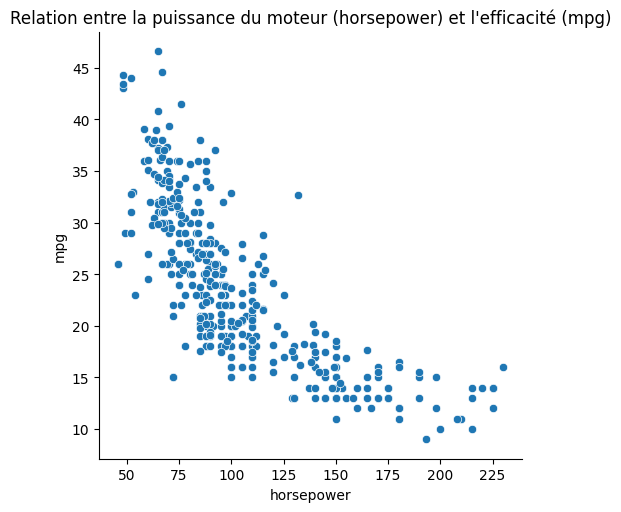

In [46]:
# à écrire
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame contenant les données

# Créer un relplot de type scatter
sns.relplot(x='horsepower', y='mpg', data=données_clean, kind='scatter')

# Ajouter un titre pour la visualisation
plt.title('Relation entre la puissance du moteur (horsepower) et l\'efficacité (mpg)')

# Afficher le graphique
plt.show()


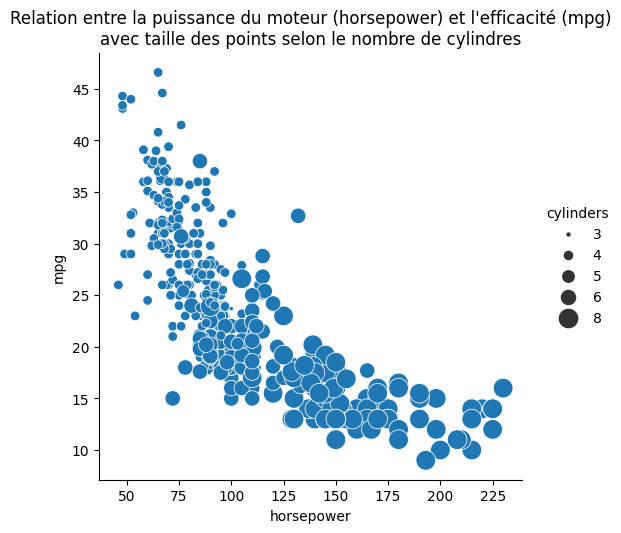

In [47]:
# faites des points d'autant plus importants que le # de cylindres est élevé (cylinders)
# qu'en déduisez-vous ?
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame contenant les données

# Créer un relplot de type scatter avec la taille des points ajustée par 'cylinders'
sns.relplot(x='horsepower', y='mpg', data=données_clean, kind='scatter', size='cylinders', sizes=(10, 200))

# Ajouter un titre pour la visualisation
plt.title('Relation entre la puissance du moteur (horsepower) et l\'efficacité (mpg)\navec taille des points selon le nombre de cylindres')

# Afficher le graphique
plt.show()

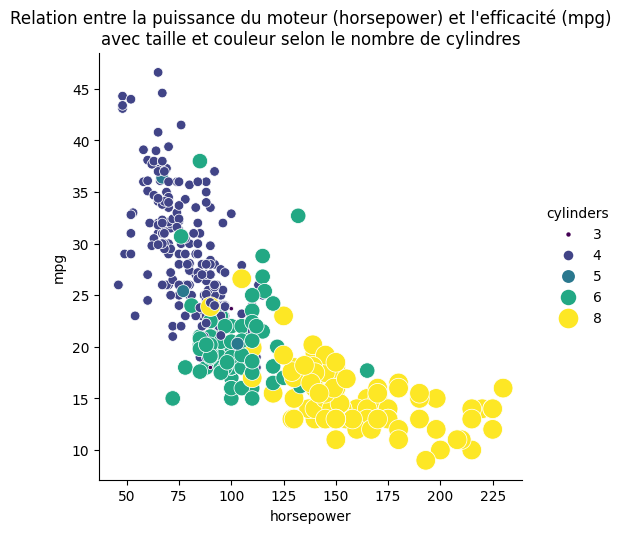

In [48]:
# ce n'est pas très visible, utilisez un paramètre pour changer la couleur

import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame contenant les données

# Créer un relplot de type scatter avec la taille des points ajustée par 'cylinders'
sns.relplot(x='horsepower', y='mpg', data=données_clean, kind='scatter', size='cylinders', hue='cylinders', 
            sizes=(10, 200), palette='viridis', legend='full')

# Ajouter un titre pour la visualisation
plt.title('Relation entre la puissance du moteur (horsepower) et l\'efficacité (mpg)\navec taille et couleur selon le nombre de cylindres')

# Afficher le graphique
plt.show()

Continuons l'exploration en étudiant comment la vitesse d'accélération du véhicule est corrélée avec son efficacité (mpg)
L'accélération est le temps en secondes pour passer de 0 à 60 mp/h


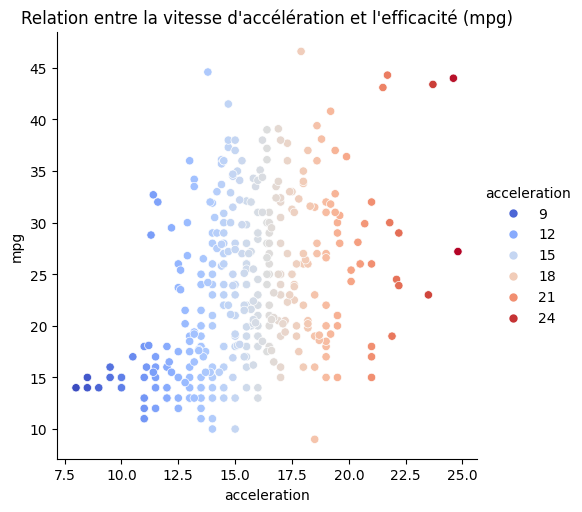

In [49]:
# à écrire
# Créer un relplot de type scatter pour explorer la relation entre 'acceleration' et 'mpg'
sns.relplot(x='acceleration', y='mpg', data=données_clean, kind='scatter', hue='acceleration', palette='coolwarm')

# Ajouter un titre pour la visualisation
plt.title('Relation entre la vitesse d\'accélération et l\'efficacité (mpg)')

# Afficher le graphique
plt.show()

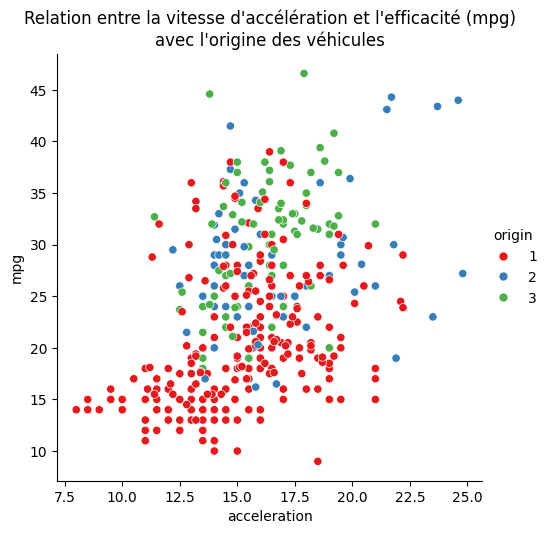

In [50]:
# prenez en compte le continent d'origine des véhicules
# qu'en déduisez-vous ?

# Créer un relplot de type scatter en prenant en compte l'origine des véhicules
sns.relplot(x='acceleration', y='mpg', data=données_clean, kind='scatter', hue='origin', palette='Set1')

# Ajouter un titre pour la visualisation
plt.title('Relation entre la vitesse d\'accélération et l\'efficacité (mpg)\navec l\'origine des véhicules')

# Afficher le graphique
plt.show()

L'origine n'est pas très claire, changer vos données de la manière suivante :
1. USA
2. Japon
3. Europe


## Graphiques relationnels avec données continus

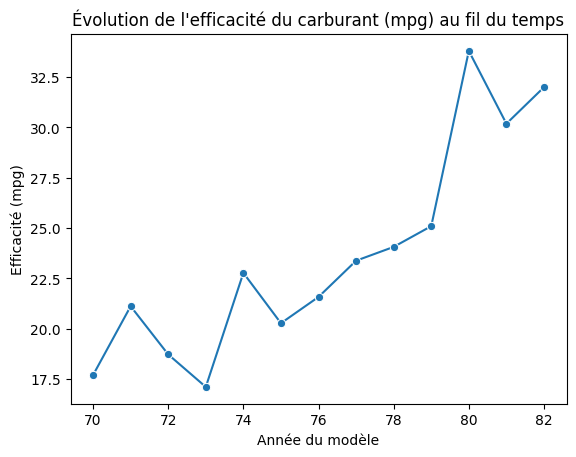

In [51]:
# visualiser comment l'efficacité du carburant (mpg  -miles per galon ) a évolué au cours du temps
# Calculer la moyenne du mpg par année
mpg_par_annee = données_clean.groupby('model year')['mpg'].mean().reset_index()

# Créer un graphique en ligne pour montrer l'évolution du mpg au fil des années
sns.lineplot(x='model year', y='mpg', data=mpg_par_annee, marker='o')

# Ajouter un titre et des labels aux axes
plt.title('Évolution de l\'efficacité du carburant (mpg) au fil du temps')
plt.xlabel('Année du modèle')
plt.ylabel('Efficacité (mpg)')

# Afficher le graphique
plt.show()

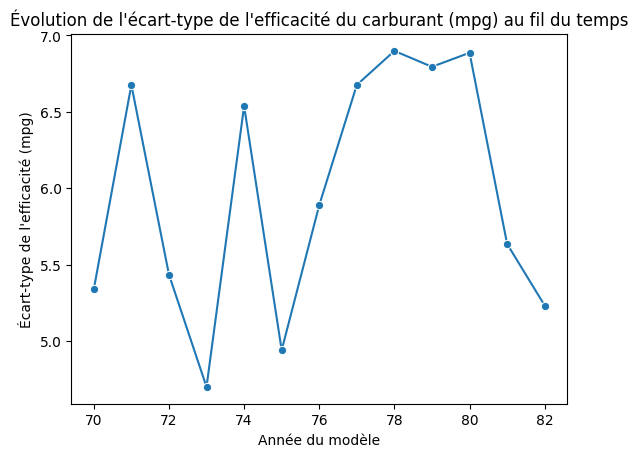

In [52]:
# changement de l'origine par l'écart type
# Calculer l'écart-type de mpg par année
ecart_type_par_annee = données_clean.groupby('model year')['mpg'].std().reset_index()

# Créer un graphique en ligne pour montrer l'évolution de l'écart-type de mpg au fil des années
sns.lineplot(x='model year', y='mpg', data=ecart_type_par_annee, marker='o')

# Ajouter un titre et des labels aux axes
plt.title('Évolution de l\'écart-type de l\'efficacité du carburant (mpg) au fil du temps')
plt.xlabel('Année du modèle')
plt.ylabel('Écart-type de l\'efficacité (mpg)')

# Afficher le graphique
plt.show()

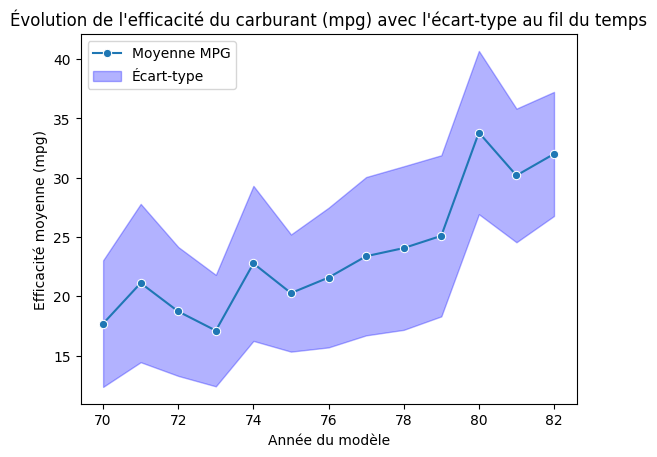

In [53]:
# remplacer l'intervalle de confiance en ombré par l'écart-type

# Calculer la moyenne et l'écart-type de mpg par année
mpg_par_annee = données_clean.groupby('model year')['mpg'].agg(['mean', 'std']).reset_index()

# Créer un graphique en ligne pour montrer l'évolution du mpg au fil du temps avec l'écart-type comme ombré
sns.lineplot(x='model year', y='mean', data=mpg_par_annee, marker='o', label='Moyenne MPG')

# Ajouter une zone ombrée pour l'écart-type autour de la moyenne
plt.fill_between(mpg_par_annee['model year'], 
                 mpg_par_annee['mean'] - mpg_par_annee['std'], 
                 mpg_par_annee['mean'] + mpg_par_annee['std'], 
                 color='blue', alpha=0.3, label="Écart-type")

# Ajouter un titre et des labels aux axes
plt.title('Évolution de l\'efficacité du carburant (mpg) avec l\'écart-type au fil du temps')
plt.xlabel('Année du modèle')
plt.ylabel('Efficacité moyenne (mpg)')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

Il serait intéressant d'étudier également l'évolution de la puissance des véhicules au fur et à mesure des années
Visualisez cette évolution, qu'en déduisez-vous ?

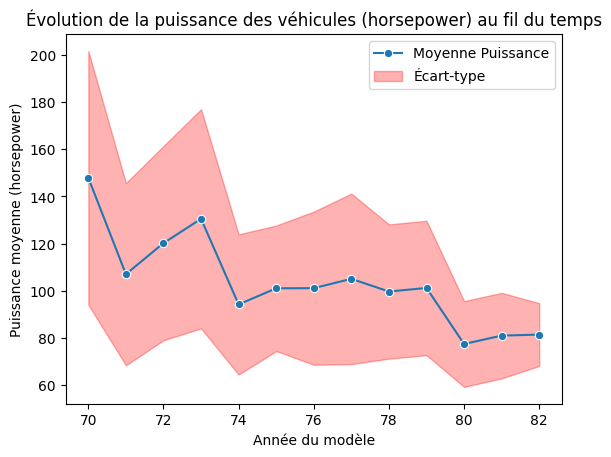

In [54]:

# Calculer la moyenne et l'écart-type de la puissance (horsepower) par année
puissance_par_annee = données_clean.groupby('model year')['horsepower'].agg(['mean', 'std']).reset_index()

# Créer un graphique en ligne pour montrer l'évolution de la puissance au fil du temps
sns.lineplot(x='model year', y='mean', data=puissance_par_annee, marker='o', label='Moyenne Puissance')

# Ajouter une zone ombrée pour l'écart-type autour de la moyenne
plt.fill_between(puissance_par_annee['model year'], 
                 puissance_par_annee['mean'] - puissance_par_annee['std'], 
                 puissance_par_annee['mean'] + puissance_par_annee['std'], 
                 color='red', alpha=0.3, label="Écart-type")

# Ajouter un titre et des labels aux axes
plt.title('Évolution de la puissance des véhicules (horsepower) au fil du temps')
plt.xlabel('Année du modèle')
plt.ylabel('Puissance moyenne (horsepower)')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

C:\Users\Lahro\AppData\Local\Temp\ipykernel_21184\876962183.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='model year', y='mean', hue='origin', style='origin',


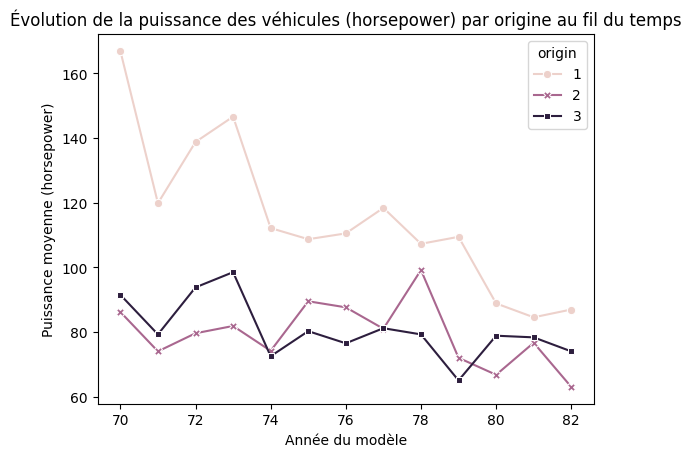

In [55]:
## visualiser le même graphique avec une couleur et un style différent suivant l'origine des véhicules
# mettez à None l'option ci pour ne pas dessiner l'intervalle de confiance

# Calculer la moyenne et l'écart-type de la puissance (horsepower) par année et origine
puissance_par_annee_et_origine = données_clean.groupby(['model year', 'origin'])['horsepower'].agg(['mean', 'std']).reset_index()

# Créer un graphique en ligne pour montrer l'évolution de la puissance au fil du temps par origine
sns.lineplot(x='model year', y='mean', hue='origin', style='origin', 
             data=puissance_par_annee_et_origine, 
             markers=True, dashes=False, ci=None)

# Ajouter un titre et des labels aux axes
plt.title('Évolution de la puissance des véhicules (horsepower) par origine au fil du temps')
plt.xlabel('Année du modèle')
plt.ylabel('Puissance moyenne (horsepower)')

# Afficher le graphique
plt.show()

## les variables catégorielles catplot()

In [56]:
# afficher le nombre de modèles de chaque millésime (année de la voiture)
# Calculer le nombre de modèles par année (millésime)
nombre_par_annee = données_clean['model year'].value_counts().sort_index()

# Afficher le résultat
print(nombre_par_annee)

model year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: count, dtype: int64


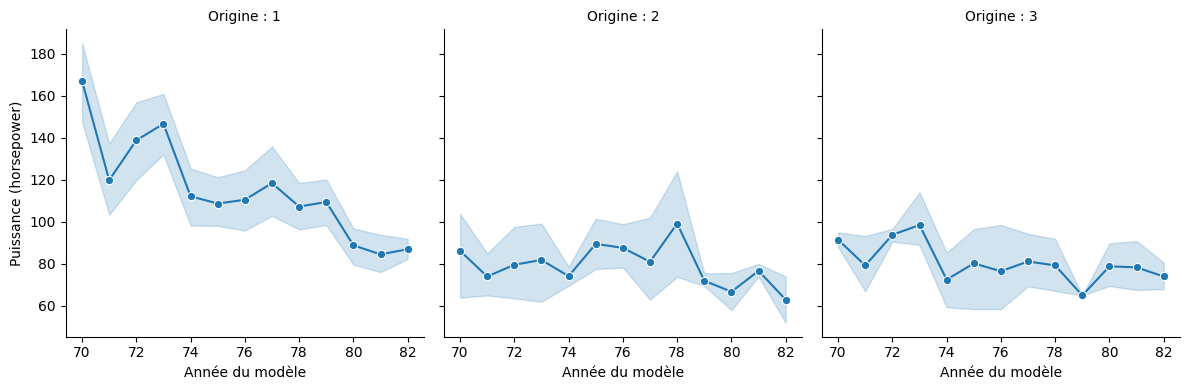

In [57]:
# nous allons un peu raffiner ce graphisme en affichant une sous-figure sous forme de colonnes pour
# chaque pays d'origine du véhicule
# Créer une grille de sous-figures (FacetGrid) basée sur l'origine
g = sns.FacetGrid(données_clean, col="origin", col_wrap=None, height=4, sharey=True)

# Ajouter un graphique en ligne pour chaque sous-figure
g.map(sns.lineplot, "model year", "horsepower", marker="o")

# Ajuster les titres et les axes
g.set_axis_labels("Année du modèle", "Puissance (horsepower)")
g.set_titles("Origine : {col_name}")
g.tight_layout()

# Afficher le graphique
plt.show()

In [58]:
## Visualiser en utilisant toujours catplot
# l'évolution du poids des véhicules année par année


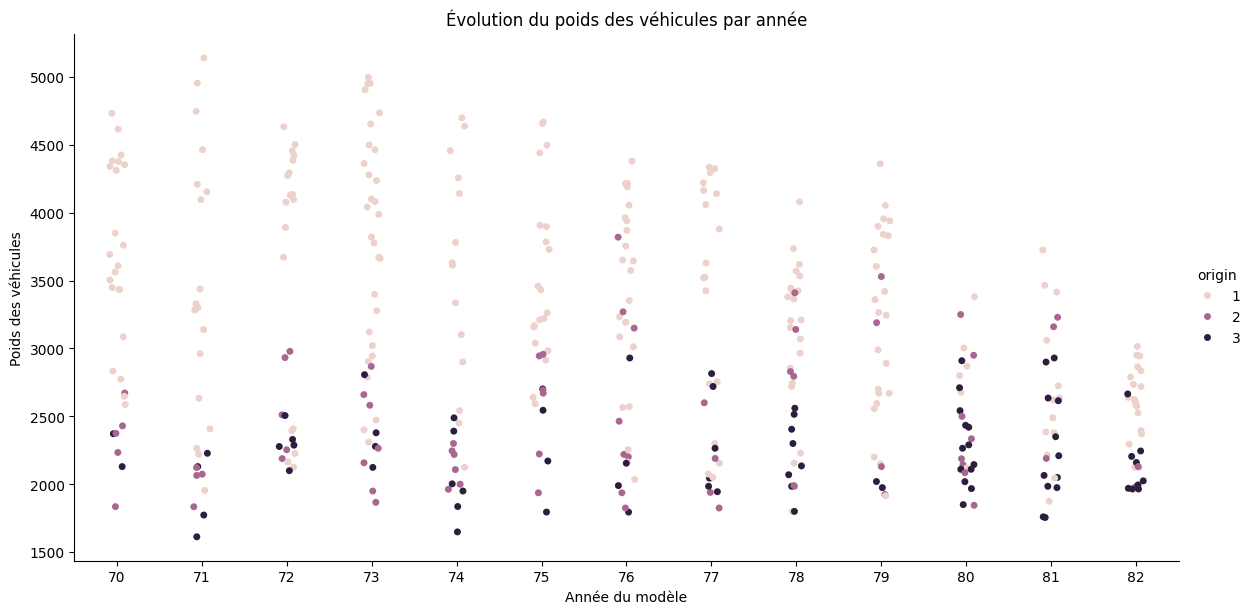

In [59]:
## Visualiser en utilisant toujours catplot
# l'évolution du poids des véhicules année par année
# Visualiser l'évolution du poids des véhicules par année
sns.catplot(
    x="model year", 
    y="weight", 
    data=données_clean, 
    kind="strip",  # Type de graphique pour voir la distribution des points
    height=6, 
    aspect=2, 
    hue="origin"  # Coloration selon le pays d'origine
)

# Ajouter un titre et des labels
plt.title("Évolution du poids des véhicules par année")
plt.xlabel("Année du modèle")
plt.ylabel("Poids des véhicules")

# Afficher le graphique
plt.show()